<center>PROGETTO<center>

<center>GRUPPO DEI ROMANI<center>

In primo luogo, è importante importare le **librerie** di interesse in modo che possano essere utilizzate e richiamate nel codice.

In [ ]:
# SE FOLIUM NON E' GIA' STATO INSTALLATO, PROVVEDERE TOGLIENDO "#" E MANDARE IN ESECUZIONE IL SEGUENTE CODICE
# !pip install folium

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
import folium

Come primo step importiamo i file.*CSV* relativi all'insieme `generation` e ai sottoinsiemi di `studenti` e `insegnanti` creando rispettivamente tre oggetti definiti come:


In [2]:
generation_ = pd.read_csv("file/generation.csv", delimiter = ';', dtype={'Telefono': str})
students_ = pd.read_csv("file/studenti.csv", delimiter = ';')
teachers_ = pd.read_csv("file/insegnanti.csv", delimiter = ';')

Trasformo i csv in json e li salvo in locale

In [3]:
generation_json = generation_.to_json(orient='records')
with open('file/generation_json.json', 'w') as file:
    file.write(generation_json)

students_json = students_.to_json(orient='records')
with open('file/students_json.json', 'w') as file:
    file.write(students_json)

teachers_json = teachers_.to_json(orient='records')
with open('file/teachers_json.json', 'w') as file:
    file.write(teachers_json)

I precedenti file.*CSV* non saranno più necessari in quanto sono stati convertiti in file.*JSON* da cui sono stati poi creati i rispettivi oggetti:

In [4]:
generation_json = js.load(open("file/generation_json.json"))
students_json = js.load(open("file/students_json.json"))
teachers_json = js.load(open("file/teachers_json.json"))

Importiamo il file.*JSON* che contiene le *coordinate* di ogni città italiana necessario per la successiva creazione di un grafico mappa.

In [5]:
coordinate_json = js.load(open("file/italy_geo.json"))

Creiamo quattro Data Frame rappresentati dai quattro file.*JSON*

In [6]:
generation = pd.DataFrame(generation_json)
students = pd.DataFrame(students_json)
teachers = pd.DataFrame(teachers_json)
coordinate = pd.DataFrame(coordinate_json)

Creiamo una copia dei Data Frame per evitare modifiche dirette ai file principali e quindi la perdita di dati.

In [7]:
generation_1 = generation.copy()
students_1 = students.copy()
teachers_1 = teachers.copy()
coordinate_1 = coordinate.copy()

Abbiamo creato la possibilità di inserire tramite input esterno, nuove persone:

In [ ]:
nuova_riga = {}
scelta = input("Vuoi inserire uno studente (S), un insegnante (T), o un membro di generation (G): ")
while scelta != 'S' and scelta != 'T' and scelta != 'G':
    scelta = input("Hai inserito un valore sbagliato. Inserisci 'S' per uno studente, 'T' per un insegnante o 'G' per un membro di generation: ")

nuova_riga2 = {}
nuova_riga['Nome'] = input("Inserisci il nome: ")
nuova_riga['Cognome'] = input("Inserisci il cognome: ")
nuova_riga['Telefono'] = input("Inserisci il telefono: ")
nuova_riga['Colore_occhi'] = input("Inserisci il colore degli occhi: ")
nuova_riga['Sesso'] = input("Inserisci il sesso (M o F): ")
nuova_riga['Eta'] = int(input("Inserisci l'età: "))
nuova_riga['Provenienza'] = input("Inserisci la provenienza (Nord, Centro, Sud): ")
nuova_riga['Citta'] = input("Inserisci la città: ")
nuova_riga['ID'] = scelta + nuova_riga['Nome'][:1] + nuova_riga['Cognome'][:1] + nuova_riga['Telefono'][:2] + nuova_riga['Provenienza'][:1]

df_nuova_riga = pd.DataFrame(nuova_riga, index=[0])

generation_1 = pd.concat([generation_1, df_nuova_riga], ignore_index=True)
    

if scelta == 'S':
    nuova_riga2['ID'] = nuova_riga['ID']    
    nuova_riga2['Voto_Python'] = int(input("Inserisci il voto di Python: "))
    nuova_riga2['Voto_Soft_Skill'] = int(input("Inserisci il voto di Soft Skill: "))
    nuova_riga2['Voto_Excel'] = int(input("Inserisci il voto di Excel: "))  
    df_nuova_riga2 = pd.DataFrame(nuova_riga2, index=[0])
    students_1 = pd.concat([students_1, df_nuova_riga2], ignore_index=True)
    print("Fine")
    
elif scelta == 'T':
    nuova_riga2['ID'] = nuova_riga['ID']
    nuova_riga2['Materia'] = input("Inserisci la materia: ")
    df_nuova_riga2 = pd.DataFrame(nuova_riga2, index=[0])
    teachers_1 = pd.concat([teachers_1, df_nuova_riga2], ignore_index=True)
    print("Fine")
    
else:
    print("Fine")

Effettuiamo un controllo sull'effettivo funzionamento dell'input esterno.

In [8]:
generation_1.tail()

,ID,Nome,Cognome,Telefono,Colore_occhi,Sesso,Eta,Provenienza,Citta
27,SAP37C,Arca,Planet,3761475148,Verdi,F,23,Centro,Avezzano
28,SGK37S,Garry,Kasparov,3773932888,Marroni,M,33,Sud,Nuoro
29,SAE37N,Albert,Einstein,3786390627,Blu,M,45,Nord,Vicenza
30,SAA37N,Aurora,Adkins,3798848366,Marroni,F,19,Nord,Rovigo
31,SHG38C,Hermione,Granger,3811306106,Marroni,F,43,Centro,Montepulciano


Facciamo il merge dei file.*JSON* specifici riferiti ai dataset `studenti` e `insegnanti` con il dataset `generation`

In [9]:
students_complete = pd.merge(generation_1, students_1, how ='right', left_on='ID', right_on='ID')
teachers_complete = pd.merge(generation_1, teachers_1, how ='right', left_on='ID', right_on='ID')
generation_complete = pd.merge(generation_1, students_1, how ='left', left_on='ID', right_on='ID')
generation_complete_1 = pd.merge(generation_complete, teachers_1, how = 'left', left_on = 'ID', right_on = 'ID')

Completiamo il nostro dataset con le coordinate attraverso il merge:

In [10]:
generation_complete_1 = pd.merge(generation_complete_1, coordinate_1, how = 'left', left_on = 'Citta', right_on = 'comune')
generation_complete_1.head(10)

,ID,Nome,Cognome,Telefono,Colore_occhi,Sesso,Eta,Provenienza,Citta,Voto_Python,Voto_Soft_Skill,Voto_Excel,Materia,istat,comune,lng,lat
0,GCS31N,Costanza,Sciaccalunga,3128987272,Verdi,F,35,Nord,Bologna,NaN,NaN,NaN,NaN,37006,Bologna,11.3417208,44.4943668
1,GMC39N,Marilena,Costa,3980283749,Blu,F,40,Nord,Asti,NaN,NaN,NaN,NaN,5005,Asti,8.20414255,44.89912921
2,GLS37S,Ljusi,Shehaj,3729989875,Marroni,M,30,Sud,Salerno,NaN,NaN,NaN,NaN,65116,Salerno,14.75940296,40.67821959
3,GCO32C,Claudia,Osservatrice,3216785367,Verdi,F,45,Centro,Perugia,NaN,NaN,NaN,NaN,54039,Perugia,12.38824699,43.1067584
4,TGV34S,Gaetano,Vitale,3478882221,Marroni,M,33,Sud,Palermo,NaN,NaN,NaN,Python,82053,Palermo,13.36235675,38.11569725
5,TGC32N,Giulia,Callegarin,3203673214,Blu,F,30,Nord,Trento,NaN,NaN,NaN,Excel,22205,Trento,11.12123097,46.06893511
6,TDS32N,Diego,Sforza,3205667821,Marroni,M,44,Nord,Aosta,NaN,NaN,NaN,Soft skill,7003,Aosta,7.32014937,45.73750285
7,SGR38C,Gabriele,Rocco,3806848483,Marroni,M,24,Centro,Roma,30.0,22.0,22.0,NaN,58091,Roma,12.48366723,41.89277044
8,SSD32C,Susanna,Di Giammarco,3245758392,Marroni,F,23,Centro,Pescara,23.0,23.0,30.0,NaN,68028,Pescara,14.21364841,42.46458397
9,SLA34C,Luca,Albertini,3457812834,Marroni,M,30,Centro,Pisa,28.0,21.0,21.0,NaN,50026,Pisa,10.40127259,43.71553206


Visualizziamo il risultato ordinando le colonne nel modo seguente:

In [11]:
generation_complete_1 = generation_complete_1[["ID","Nome","Cognome","Telefono","Colore_occhi","Sesso","Eta","Provenienza","Citta","lng","lat"]]

generation_complete_1.head()

,ID,Nome,Cognome,Telefono,Colore_occhi,Sesso,Eta,Provenienza,Citta,lng,lat
0,GCS31N,Costanza,Sciaccalunga,3128987272,Verdi,F,35,Nord,Bologna,11.3417208,44.4943668
1,GMC39N,Marilena,Costa,3980283749,Blu,F,40,Nord,Asti,8.20414255,44.89912921
2,GLS37S,Ljusi,Shehaj,3729989875,Marroni,M,30,Sud,Salerno,14.75940296,40.67821959
3,GCO32C,Claudia,Osservatrice,3216785367,Verdi,F,45,Centro,Perugia,12.38824699,43.1067584
4,TGV34S,Gaetano,Vitale,3478882221,Marroni,M,33,Sud,Palermo,13.36235675,38.11569725


Generiamo una nuova colonna riferita a `students_complete` con la media dei voti per ogni studente

In [12]:
students_complete['Media'] = students_complete[['Voto_Python','Voto_Soft_Skill', 'Voto_Excel']].mean(axis=1).round(2)
students_complete.head()

,ID,Nome,Cognome,Telefono,Colore_occhi,Sesso,Eta,Provenienza,Citta,Voto_Python,Voto_Soft_Skill,Voto_Excel,Media
0,SGR38C,Gabriele,Rocco,3806848483,Marroni,M,24,Centro,Roma,30,22,22,24.67
1,SSD32C,Susanna,Di Giammarco,3245758392,Marroni,F,23,Centro,Pescara,23,23,30,25.33
2,SLA34C,Luca,Albertini,3457812834,Marroni,M,30,Centro,Pisa,28,21,21,23.33
3,SCM37C,Carlotta,Mannucci,3789632718,Marroni,F,22,Centro,Frosinone,25,18,28,23.67
4,SFR36C,Francesco,Ragazzo,3679283048,Verdi,M,28,Centro,Latina,27,22,23,24.00


Creiamo un istogramma riferito alla colonna `Colore_occhi`:

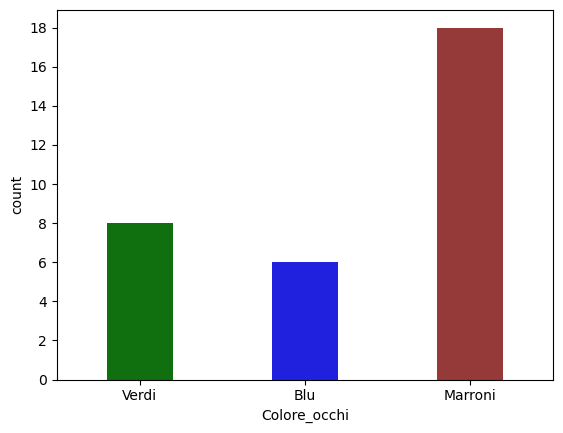

In [13]:
sns.countplot(x = 'Colore_occhi', data = generation_1, palette=['green', 'blue', 'brown'], width=0.4)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
plt.show()

Creiamo un grafico a torta secondo il `Sesso`

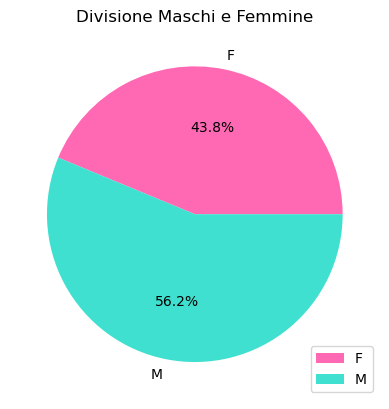

In [14]:
sex = generation_1.groupby('Sesso').size() 
sex.plot(kind='pie', autopct='%.1f%%', colors=['hotpink', 'turquoise'])
plt.title('Divisione Maschi e Femmine')
plt.legend(loc='lower right')
plt.show()

Visualizziamo uno scatterplot con i voti di python e di excel condizionati al genere.

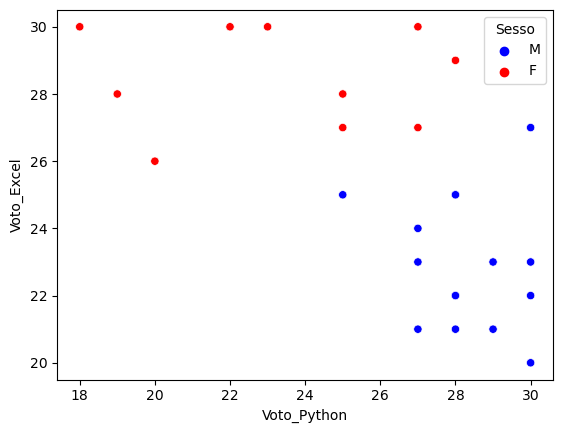

In [18]:
sns.scatterplot(x='Voto_Python',y='Voto_Excel',hue='Sesso',data=students_complete, palette=['blue','red'])
plt.show()

Realizziamo un grafico jointplot per confrontare, distinguendo tra i generi, età e media dei voti.

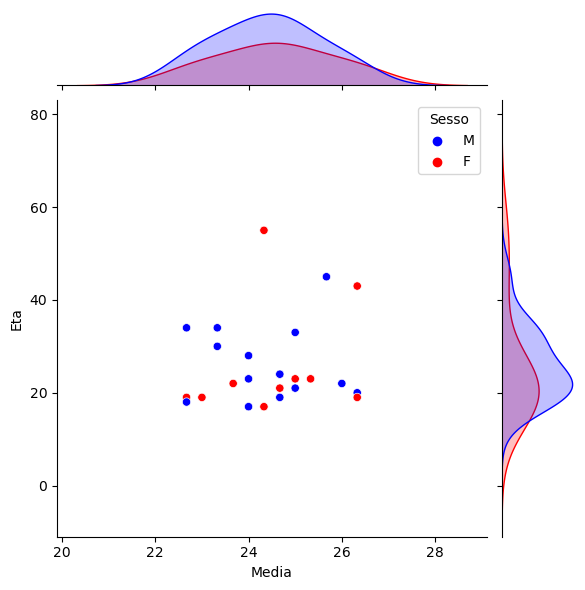

In [17]:
sns.jointplot(x='Media', y='Eta', hue='Sesso', data=students_complete, palette=['blue', 'red'])
plt.show()

Creiamo bar plot dei voti delle diverse materie rispetto al sesso

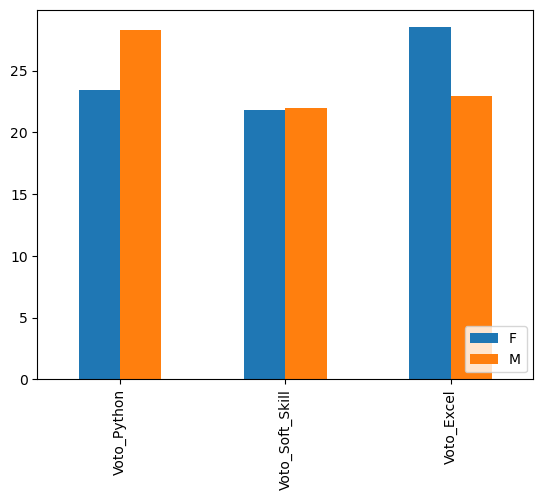

In [19]:
students_group = students_complete.groupby('Sesso')[['Voto_Python', 'Voto_Soft_Skill', 'Voto_Excel']].mean()
students_group = students_group.T
ax = students_group.plot(kind='bar')
ax.legend(loc='lower right')
plt.show()

In conclusione abbiamo creato un grafico con relativa mappa sulla provenienza delle persone.

In [20]:
italia = folium.Map(location=[41.87194,12.56738], zoom_start=6, tiles="CartoDB Positron")
for index, row in generation_complete_1.iterrows():
    if row["Provenienza"] == "Nord":
        coordinate = [row["lat"],row["lng"]]
        folium.Marker(location = coordinate, icon=folium.Icon(color='green', icon='')).add_to(italia)
    elif row["Provenienza"] == "Centro":
        coordinate = [row["lat"],row["lng"]]
        folium.Marker(location = coordinate, icon=folium.Icon(color='lightgray', icon='')).add_to(italia)
    else:
        coordinate = [row["lat"],row["lng"]]
        folium.Marker(location = coordinate, icon=folium.Icon(color='red', icon='')).add_to(italia)

        
italia